In [2]:
#Question 1a

In [2]:
import pandas as pd
import numpy as np

In [3]:
pdf = pd.read_csv('hw.csv')
print(pdf)

             date  withpre      id  rootid  fatherid  catid  \
0      2020-11-27      1.0  683333       2        79   2058   
1      2020-11-27      1.0  683332       2        71   2712   
2      2020-11-27      1.0  683331       2        78   3094   
3      2020-11-27      NaN  683330       2        57   5035   
4      2020-11-27      1.0  683329       2        67   2564   
...           ...      ...     ...     ...       ...    ...   
79995  2014-10-27      1.0  550352       2        56   2081   
79996  2014-10-27      1.0  550351       2        59   2178   
79997  2014-10-27      1.0  550350       2        75   3061   
79998  2014-10-27      1.0  550349       2        56   2082   
79999  2014-10-27      1.0  550348       2        74   2950   

                   catname  catfathername  \
0          Bel Air Heights   Diamond Hill   
1            Fa Yuen Plaza       Mong Kok   
2           Caldecott Hill  Yau Yat Tsuen   
3         Pang Ching Court   Wong Tai Sin   
4       Metro Harb

/Users/madlennqu/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
pdf = pdf.drop(columns=['withpre', 'id', 'rootid', 'fatherid', 'catid', 'url_father', 'url_cat', 'source',
                        'contract', 'memo', 'price', 'holddate', 'winloss_flag', 'winloss', 'act_area', 'area', 
                        'sq_price', 'sq_actprice', 'month', 'day', 'date_dm', 'block', 'state', 'room', 'addr', 
                        'Unnamed: 34'])
pdf = pdf.rename(columns={"catname": "Estate", "catfathername": "District", "price_value": "Price", 
                          "arearaw": "Gross_Floor_Area", "sq_price_value": "GFA", "sq_actprice_value": "SFA",
                          "date_y": "Year"})
print(pdf)

             date               Estate       District     Price  \
0      2020-11-27      Bel Air Heights   Diamond Hill  10000000   
1      2020-11-27        Fa Yuen Plaza       Mong Kok   4280000   
2      2020-11-27       Caldecott Hill  Yau Yat Tsuen  11000000   
3      2020-11-27     Pang Ching Court   Wong Tai Sin   4900000   
4      2020-11-27   Metro Harbour View   Tai Kok Tsui   7150000   
...           ...                  ...            ...       ...   
79995  2014-10-27         Amoy Gardens    Kowloon Bay   4350000   
79996  2014-10-27         Marple Court   Kowloon Tong   7500000   
79997  2014-10-27        Harbour Place       Hung Hom   6500000   
79998  2014-10-27     Richland Gardens    Kowloon Bay   3790000   
79999  2014-10-27  The Victoria Towers  Tsim Sha Tsui   6000000   

      Gross_Floor_Area       GFA       SFA  Year floor  
0                  826  12106.54  15220.70  2020    2#  
1                  347  12334.29  20000.00  2020    1#  
2                 1282  

In [6]:
pdf.loc[(pdf.GFA == 0),['GFA']]

,GFA
12,0.0
15,0.0
19,0.0
28,0.0
29,0.0
...,...
79985,0.0
79991,0.0
79992,0.0
79993,0.0


In [7]:
pdf.loc[(pdf.SFA == 0),['SFA']]

,SFA
3,0.0
6,0.0
8,0.0
10,0.0
11,0.0
...,...
79991,0.0
79992,0.0
79993,0.0
79994,0.0


In [8]:
pdf = pdf.drop(pdf[(pdf.SFA == 0) & (pdf.GFA == 0)].index)

In [9]:
pdf['GFA'].value_counts()

0.00        13066
10000.00      217
8333.33       109
8000.00        81
12500.00       70
            ...  
14988.18        1
12949.85        1
8278.01         1
15070.64        1
10177.51        1
Name: GFA, Length: 31331, dtype: int64

In [10]:
pdf['SFA'].value_counts()

0.00        24301
11605.42       53
16666.67       53
15000.00       45
16000.00       39
            ...  
18774.90        1
13978.26        1
13137.58        1
21827.40        1
16183.57        1
Name: SFA, Length: 28437, dtype: int64

In [11]:
pdf.isnull().sum()

date                0
Estate              0
District            0
Price               0
Gross_Floor_Area    0
GFA                 0
SFA                 0
Year                0
floor               0
dtype: int64

In [12]:
pdf['date']= pd.to_datetime(pdf['date']) 
pdf['date'].dt.to_period('M')
print(pdf)

            date               Estate       District     Price  \
0     2020-11-27      Bel Air Heights   Diamond Hill  10000000   
1     2020-11-27        Fa Yuen Plaza       Mong Kok   4280000   
2     2020-11-27       Caldecott Hill  Yau Yat Tsuen  11000000   
3     2020-11-27     Pang Ching Court   Wong Tai Sin   4900000   
4     2020-11-27   Metro Harbour View   Tai Kok Tsui   7150000   
...          ...                  ...            ...       ...   
79995 2014-10-27         Amoy Gardens    Kowloon Bay   4350000   
79996 2014-10-27         Marple Court   Kowloon Tong   7500000   
79997 2014-10-27        Harbour Place       Hung Hom   6500000   
79998 2014-10-27     Richland Gardens    Kowloon Bay   3790000   
79999 2014-10-27  The Victoria Towers  Tsim Sha Tsui   6000000   

      Gross_Floor_Area       GFA       SFA  Year floor  
0                  826  12106.54  15220.70  2020    2#  
1                  347  12334.29  20000.00  2020    1#  
2                 1282   8580.34  11

In [13]:
#Question 1b

In [14]:
#I found data from https://www.censtatd.gov.hk/en/scode200.html, and substraced four main variables

In [15]:
Labour_pdf = pd.read_csv('Labour Force, Unemployment, Underemployment.csv')
print(Labour_pdf)

    Year/Period  Unnamed: 1  Unnamed: 2 Unnamed: 3
0          1982      2498.1        91.0       N.A.
1          1983      2540.5       113.8        1.9
2          1984      2606.2       101.0        1.1
3          1985      2626.9        83.6        1.9
4          1986      2699.7        76.1        1.7
5          1987      2728.2        47.4          1
6          1988      2762.8        37.7        0.7
7          1989      2752.8        29.7        0.8
8          1990      2748.1        36.6        0.9
9          1991      2804.1        50.4        1.6
10         1992      2792.3        54.7        2.1
11         1993      2856.4        56.3        1.6
12         1994      2929.0        56.2        1.4
13         1995      3000.7        95.6        2.1
14         1996      3160.8        87.4        1.6
15         1997      3234.8        71.2        1.1
16         1998      3276.1       154.1        2.5
17         1999      3319.6       207.5        2.9
18         2000      3374.2    

In [16]:
Labour_pdf = Labour_pdf.rename(columns={"Year/Period":"Year","Unnamed: 1": "Labour Force", 
                                        "Unnamed: 2": "Unemployed persons", "Unnamed: 3": "Unemployment rate", 
                                        "Unnamed: 4": "Underemployment rate"})
print(Labour_pdf)

    Year  Labour Force  Unemployed persons Unemployment rate
0   1982        2498.1                91.0              N.A.
1   1983        2540.5               113.8               1.9
2   1984        2606.2               101.0               1.1
3   1985        2626.9                83.6               1.9
4   1986        2699.7                76.1               1.7
5   1987        2728.2                47.4                 1
6   1988        2762.8                37.7               0.7
7   1989        2752.8                29.7               0.8
8   1990        2748.1                36.6               0.9
9   1991        2804.1                50.4               1.6
10  1992        2792.3                54.7               2.1
11  1993        2856.4                56.3               1.6
12  1994        2929.0                56.2               1.4
13  1995        3000.7                95.6               2.1
14  1996        3160.8                87.4               1.6
15  1997        3234.8  

In [17]:
new_pdf = pd.merge(pdf, Labour_pdf, how='left', on = ['Year'])
print(new_pdf)

            date               Estate       District     Price  \
0     2020-11-27      Bel Air Heights   Diamond Hill  10000000   
1     2020-11-27        Fa Yuen Plaza       Mong Kok   4280000   
2     2020-11-27       Caldecott Hill  Yau Yat Tsuen  11000000   
3     2020-11-27     Pang Ching Court   Wong Tai Sin   4900000   
4     2020-11-27   Metro Harbour View   Tai Kok Tsui   7150000   
...          ...                  ...            ...       ...   
62553 2014-10-27         Amoy Gardens    Kowloon Bay   4350000   
62554 2014-10-27         Marple Court   Kowloon Tong   7500000   
62555 2014-10-27        Harbour Place       Hung Hom   6500000   
62556 2014-10-27     Richland Gardens    Kowloon Bay   3790000   
62557 2014-10-27  The Victoria Towers  Tsim Sha Tsui   6000000   

      Gross_Floor_Area       GFA       SFA  Year floor  Labour Force  \
0                  826  12106.54  15220.70  2020    2#        3888.2   
1                  347  12334.29  20000.00  2020    1#        3

In [18]:
#Question 2

In [19]:
new_pdf["year-month"] = new_pdf['date'].dt.to_period('M')
new_pdf = new_pdf.drop(columns=['date','Price','Gross_Floor_Area','Year','Labour Force',
                                'Unemployed persons','Unemployment rate'])
print(new_pdf)

                    Estate       District       GFA       SFA floor year-month
0          Bel Air Heights   Diamond Hill  12106.54  15220.70    2#    2020-11
1            Fa Yuen Plaza       Mong Kok  12334.29  20000.00    1#    2020-11
2           Caldecott Hill  Yau Yat Tsuen   8580.34  11099.90     7    2020-11
3         Pang Ching Court   Wong Tai Sin   8404.80      0.00    1#    2020-11
4       Metro Harbour View   Tai Kok Tsui  12016.81  17354.37    1#    2020-11
...                    ...            ...       ...       ...   ...        ...
62553         Amoy Gardens    Kowloon Bay   8682.63  11125.32    2#    2014-10
62554         Marple Court   Kowloon Tong   8823.53  11061.95     9    2014-10
62555        Harbour Place       Hung Hom  10317.46  13513.51     4    2014-10
62556     Richland Gardens    Kowloon Bay   8063.83      0.00    1#    2014-10
62557  The Victoria Towers  Tsim Sha Tsui   4672.90   6493.51    3#    2014-10

[62558 rows x 6 columns]


In [20]:
#District Dataframe
district_df = new_pdf.drop(columns=['Estate'])
district_df = district_df.groupby(['year-month','District',])
district_df = district_df.mean()
district_df = district_df.reset_index()
district_df = district_df.rename(columns={'GFA':'Average Unit Price (GFA)', 'SFA':'Average Unit Price (SFA)'})
print(district_df)

     year-month        District  Average Unit Price (GFA)  \
0       2014-10  Cheung Sha Wan               6812.755000   
1       2014-10    Diamond Hill               7390.230000   
2       2014-10      Ho Man Tin               9464.628462   
3       2014-10        Hung Hom               9909.782500   
4       2014-10          Jordan               9186.760000   
...         ...             ...                       ...   
2284    2020-11         Whampoa              13330.049268   
2285    2020-11    Wong Tai Sin               9999.184063   
2286    2020-11      Yau Ma Tei              13095.773333   
2287    2020-11        Yau Tong               8241.820000   
2288    2020-11   Yau Yat Tsuen              11869.491667   

      Average Unit Price (SFA)  
0                  6987.571250  
1                  4427.536000  
2                 10169.757692  
3                  7461.059167  
4                  4166.970000  
...                        ...  
2284              12960.256098  
228

In [21]:
#Estate Dataframe
estate_df = new_pdf.drop(columns=['District'])
estate_df = estate_df.groupby(['Estate', 'year-month'])
estate_df = estate_df.mean()
estate_df = estate_df.reset_index()
estate_df = estate_df.rename(columns={'GFA':'Average Unit Price (GFA)', 'SFA':'Average Unit Price (SFA)'})
print(estate_df)

               Estate year-month  Average Unit Price (GFA)  \
0      1 & 3 Ede Road    2014-11                  0.000000   
1      1 & 3 Ede Road    2015-03                  0.000000   
2      1 & 3 Ede Road    2015-04                  0.000000   
3      1 & 3 Ede Road    2015-05                  0.000000   
4      1 & 3 Ede Road    2015-06                  0.000000   
...               ...        ...                       ...   
21662          i-home    2020-06              12037.453333   
21663          i-home    2020-08              12008.065000   
21664          i-home    2020-09              12396.250000   
21665          i-home    2020-10              12292.870000   
21666          i-home    2020-11              12746.630000   

       Average Unit Price (SFA)  
0                     32591.450  
1                     60950.820  
2                     42017.005  
3                     36178.020  
4                     47740.700  
...                         ...  
21662            

In [22]:
#Question 3

In [23]:
import matplotlib.pyplot as plt
from sklearn import linear_model

In [24]:
new_pdf.set_index(new_pdf['year-month'], inplace=True)
print(new_pdf)

                         Estate       District       GFA       SFA floor  \
year-month                                                                 
2020-11         Bel Air Heights   Diamond Hill  12106.54  15220.70    2#   
2020-11           Fa Yuen Plaza       Mong Kok  12334.29  20000.00    1#   
2020-11          Caldecott Hill  Yau Yat Tsuen   8580.34  11099.90     7   
2020-11        Pang Ching Court   Wong Tai Sin   8404.80      0.00    1#   
2020-11      Metro Harbour View   Tai Kok Tsui  12016.81  17354.37    1#   
...                         ...            ...       ...       ...   ...   
2014-10            Amoy Gardens    Kowloon Bay   8682.63  11125.32    2#   
2014-10            Marple Court   Kowloon Tong   8823.53  11061.95     9   
2014-10           Harbour Place       Hung Hom  10317.46  13513.51     4   
2014-10        Richland Gardens    Kowloon Bay   8063.83      0.00    1#   
2014-10     The Victoria Towers  Tsim Sha Tsui   4672.90   6493.51    3#   

           

In [25]:
Kowloon = new_pdf.drop(columns=['Estate','District','year-month'])
Kowloon = Kowloon.groupby(['year-month'])
Kowloon = Kowloon.mean()
print(Kowloon)

                     GFA           SFA
year-month                            
2014-10      9852.388075   6100.283944
2014-11      8582.724807   6906.224865
2014-12      7076.575937   8029.447605
2015-01      7045.783875   7992.051388
2015-02      8775.404202   6828.931597
...                  ...           ...
2020-07     11098.446599  10183.629129
2020-08     10993.808050   9757.375438
2020-09     10894.370159  10039.227619
2020-10     11141.704279   9966.071406
2020-11     11242.651604  10123.740889

[74 rows x 2 columns]


Text(0.5, 1.0, 'Overall trend of property price of Kowloon')

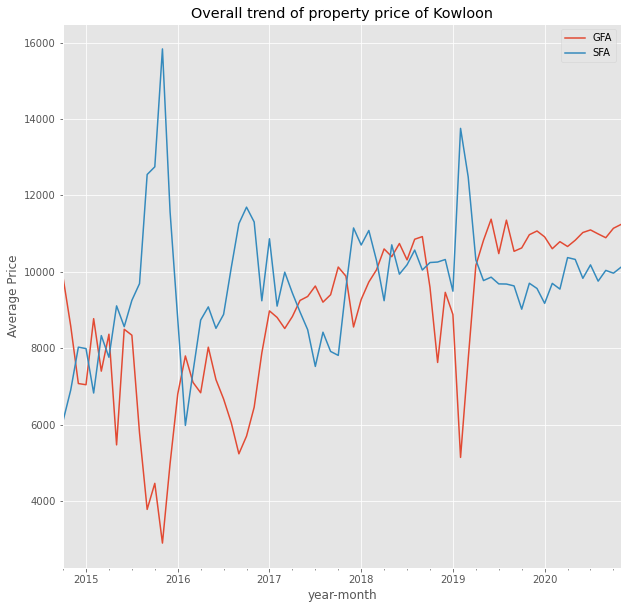

In [26]:
plt.rcParams['figure.figsize']=(10,10)
plt.style.use('ggplot')
Kowloon['GFA'].plot()
Kowloon['SFA'].plot()
plt.legend(loc=0)
plt.xlabel('year-month')
plt.ylabel('Average Price')
plt.title('Overall trend of property price of Kowloon')

In [27]:
five_district = new_pdf.drop(columns=['Estate','year-month'])
district_list = ['Diamond Hill','Mong Kok','Kowloon Bay','Kowloon Tong','Hung Hom']
five_district = five_district.loc[five_district['District'].isin(district_list)]
five_district = five_district.pivot_table(values=['GFA','SFA'],index='year-month',columns=['District'])
print(five_district)

                     GFA                                            \
District    Diamond Hill      Hung Hom   Kowloon Bay  Kowloon Tong   
year-month                                                           
2014-10      7390.230000   9909.782500   7631.450000  12020.418571   
2014-11      7758.864375   9195.718533   8098.736316   3926.328611   
2014-12      7857.365333   9247.979886   8362.160563   8264.249500   
2015-01      8423.631579   9373.817045   8603.608191   9388.005556   
2015-02      7913.992353   9259.377411   8818.236806   9665.764286   
...                  ...           ...           ...           ...   
2020-07     11533.004583   9685.443596  12133.826825  17571.380000   
2020-08     12437.779333  11014.247931  11982.412931  14657.221000   
2020-09     12046.762500   9748.895526  11780.202174  14042.637143   
2020-10     12201.571000   9768.052824  11824.161887  14708.586000   
2020-11     12047.120667  10416.892923  12274.592895  16249.580000   

                   

Text(0.5, 1.0, 'Trend of property price (SFA) in 5 districts')

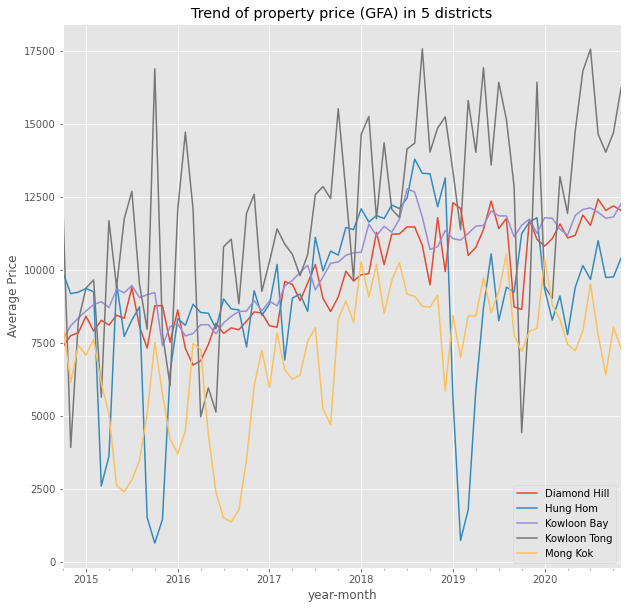

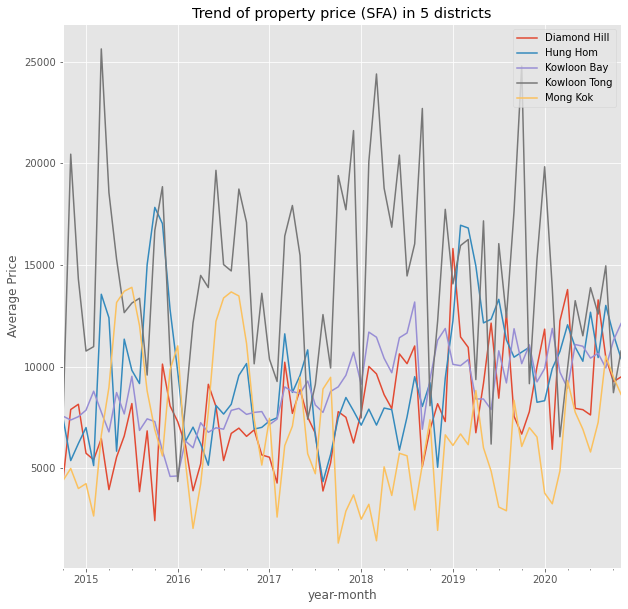

In [28]:
five_district['GFA'].plot()
plt.legend(loc=0)
plt.xlabel('year-month')
plt.ylabel('Average Price')
plt.title('Trend of property price (GFA) in 5 districts')
five_district['SFA'].plot()
plt.legend(loc=0)
plt.xlabel('year-month')
plt.ylabel('Average Price')
plt.title('Trend of property price (SFA) in 5 districts')

In [29]:
ten_estates = new_pdf.drop(columns=['District','year-month'])
estates_list = ['Bel Air Heights','Fa Yuen Plaza', 'Metro Harbour View', 'Richland Gardens', 
                'Marple Court', 'Pang Ching Court', 'Harbour Place', ' The Victoria Towers', 'Caldecott Hill', 
                'Whampoa Garden' ]
ten_estates = ten_estates.loc[ten_estates['Estate'].isin(estates_list)]
ten_estates = ten_estates.pivot_table(values=['GFA','SFA'],index='year-month',columns=['Estate'])
print(ten_estates)

                       GFA                                             \
Estate     Bel Air Heights Caldecott Hill Fa Yuen Plaza Harbour Place   
year-month                                                              
2014-10                NaN        9809.43           NaN   9755.960000   
2014-11          8904.7950        8776.37       8645.53  10383.116667   
2014-12                NaN            NaN       8789.63  10101.891053   
2015-01          8981.0000            NaN       3795.07   9973.810714   
2015-02          8744.0925        8296.59           NaN  10265.412308   
...                    ...            ...           ...           ...   
2020-07         11584.5500            NaN           NaN  14034.846429   
2020-08                NaN            NaN           NaN  13382.399286   
2020-09         12516.6400            NaN           NaN  13916.737857   
2020-10         12435.2750       10030.09           NaN  12725.272353   
2020-11         12345.7475        9806.72      1233

Text(0.5, 1.0, 'Trend of property Price (SFA) for 10 estates')

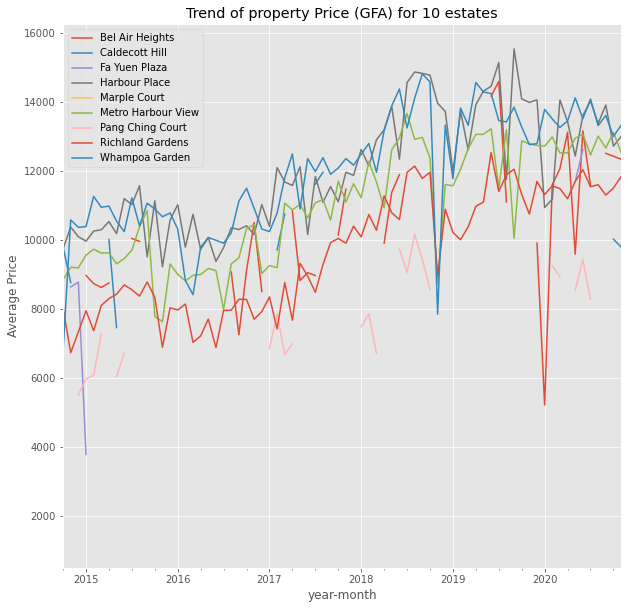

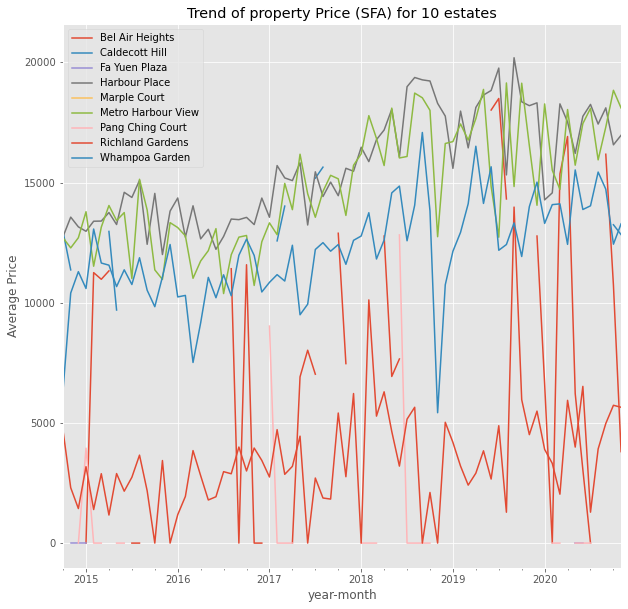

In [30]:
ten_estates['GFA'].plot()
plt.legend(loc=0)
plt.xlabel('year-month')
plt.ylabel('Average Price')
plt.title('Trend of property Price (GFA) for 10 estates')
ten_estates['SFA'].plot()
plt.legend(loc=0)
plt.xlabel('year-month')
plt.ylabel('Average Price')
plt.title('Trend of property Price (SFA) for 10 estates')

In [31]:
#Question 4

In [32]:
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [34]:
#First I cleaned floor column by dropping sybmols and zero instances
pdf['floor'] = pdf['floor'].map(lambda x: x.lstrip('#').rstrip('#'))
pdf = pdf.drop(pdf[(pdf.floor == 'None')].index)
pdf = pdf.drop(pdf[(pdf.Gross_Floor_Area == 0)].index)
pdf = pdf.drop(pdf[(pdf.Gross_Floor_Area == '0')].index)
print(pdf)

            date               Estate       District     Price  \
0     2020-11-27      Bel Air Heights   Diamond Hill  10000000   
1     2020-11-27        Fa Yuen Plaza       Mong Kok   4280000   
2     2020-11-27       Caldecott Hill  Yau Yat Tsuen  11000000   
3     2020-11-27     Pang Ching Court   Wong Tai Sin   4900000   
4     2020-11-27   Metro Harbour View   Tai Kok Tsui   7150000   
...          ...                  ...            ...       ...   
79995 2014-10-27         Amoy Gardens    Kowloon Bay   4350000   
79996 2014-10-27         Marple Court   Kowloon Tong   7500000   
79997 2014-10-27        Harbour Place       Hung Hom   6500000   
79998 2014-10-27     Richland Gardens    Kowloon Bay   3790000   
79999 2014-10-27  The Victoria Towers  Tsim Sha Tsui   6000000   

      Gross_Floor_Area       GFA       SFA  Year floor  
0                  826  12106.54  15220.70  2020     2  
1                  347  12334.29  20000.00  2020     1  
2                 1282   8580.34  11

In [35]:
pdf[["floor", "Gross_Floor_Area"]] = pdf[["floor", "Gross_Floor_Area"]].apply(pd.to_numeric)
print(pdf)

            date               Estate       District     Price  \
0     2020-11-27      Bel Air Heights   Diamond Hill  10000000   
1     2020-11-27        Fa Yuen Plaza       Mong Kok   4280000   
2     2020-11-27       Caldecott Hill  Yau Yat Tsuen  11000000   
3     2020-11-27     Pang Ching Court   Wong Tai Sin   4900000   
4     2020-11-27   Metro Harbour View   Tai Kok Tsui   7150000   
...          ...                  ...            ...       ...   
79995 2014-10-27         Amoy Gardens    Kowloon Bay   4350000   
79996 2014-10-27         Marple Court   Kowloon Tong   7500000   
79997 2014-10-27        Harbour Place       Hung Hom   6500000   
79998 2014-10-27     Richland Gardens    Kowloon Bay   3790000   
79999 2014-10-27  The Victoria Towers  Tsim Sha Tsui   6000000   

       Gross_Floor_Area       GFA       SFA  Year  floor  
0                   826  12106.54  15220.70  2020      2  
1                   347  12334.29  20000.00  2020      1  
2                  1282   8580

In [36]:
#R-Squared is 15.4%, which means that sq_price_value depends on floor and gross floor area on nearly 15%, 
#and as the coefficient for floor is 56.7864, the price will rise for $56.8 by each floor
OLS = ols("GFA ~ floor+Gross_Floor_Area", data = pdf).fit()
print(OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                    GFA   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                     4494.
Date:                Sat, 18 Dec 2021   Prob (F-statistic):               0.00
Time:                        06:21:47   Log-Likelihood:            -4.7746e+05
No. Observations:               49491   AIC:                         9.549e+05
Df Residuals:                   49488   BIC:                         9.550e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         7261.2929     44.420  

In [37]:
y = pdf.SFA 
x = pdf.drop(columns=['date','Estate','District','Price','GFA','SFA'])
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
model = LinearRegression(fit_intercept=True).fit(x_train,y_train)
ypred = model.predict(x_test)
model.fit(x, y)

LinearRegression()

In [38]:
out = np.hstack([model.intercept_,model.coef_,model.score(x_train,y_train)]).round(decimals=3)
tab = pd.DataFrame(out, columns = ['value'],
                   index=['intercept','Gross_Floor_Area','Year','floor','Rsq'])
print(tab)

                        value
intercept        -1043689.715
Gross_Floor_Area        5.101
Year                  519.430
floor                 -39.096
Rsq                     0.055


In [39]:
#Question 5

In [40]:
new_pdf2 = pd.merge(pdf, Labour_pdf, how='left', on = ['Year'])
print(new_pdf2)

            date               Estate       District     Price  \
0     2020-11-27      Bel Air Heights   Diamond Hill  10000000   
1     2020-11-27        Fa Yuen Plaza       Mong Kok   4280000   
2     2020-11-27       Caldecott Hill  Yau Yat Tsuen  11000000   
3     2020-11-27     Pang Ching Court   Wong Tai Sin   4900000   
4     2020-11-27   Metro Harbour View   Tai Kok Tsui   7150000   
...          ...                  ...            ...       ...   
49486 2014-10-27         Amoy Gardens    Kowloon Bay   4350000   
49487 2014-10-27         Marple Court   Kowloon Tong   7500000   
49488 2014-10-27        Harbour Place       Hung Hom   6500000   
49489 2014-10-27     Richland Gardens    Kowloon Bay   3790000   
49490 2014-10-27  The Victoria Towers  Tsim Sha Tsui   6000000   

       Gross_Floor_Area       GFA       SFA  Year  floor  Labour Force  \
0                   826  12106.54  15220.70  2020      2        3888.2   
1                   347  12334.29  20000.00  2020      1   

In [41]:
new_pdf2 = new_pdf2.rename(columns={"Labour Force": "Labour_Force", "Unemployed persons": "Unemployed_persons"})
print(new_pdf2)

            date               Estate       District     Price  \
0     2020-11-27      Bel Air Heights   Diamond Hill  10000000   
1     2020-11-27        Fa Yuen Plaza       Mong Kok   4280000   
2     2020-11-27       Caldecott Hill  Yau Yat Tsuen  11000000   
3     2020-11-27     Pang Ching Court   Wong Tai Sin   4900000   
4     2020-11-27   Metro Harbour View   Tai Kok Tsui   7150000   
...          ...                  ...            ...       ...   
49486 2014-10-27         Amoy Gardens    Kowloon Bay   4350000   
49487 2014-10-27         Marple Court   Kowloon Tong   7500000   
49488 2014-10-27        Harbour Place       Hung Hom   6500000   
49489 2014-10-27     Richland Gardens    Kowloon Bay   3790000   
49490 2014-10-27  The Victoria Towers  Tsim Sha Tsui   6000000   

       Gross_Floor_Area       GFA       SFA  Year  floor  Labour_Force  \
0                   826  12106.54  15220.70  2020      2        3888.2   
1                   347  12334.29  20000.00  2020      1   

In [42]:
y1 = new_pdf2.GFA
x1 = new_pdf2.drop(columns=['date','Estate','District','Price','Gross_Floor_Area','SFA','GFA','Year','floor',
                            'Unemployment rate'])
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.2)
model1 = LinearRegression(fit_intercept=True).fit(x1_train,y1_train)
ypred1 = model1.predict(x1_test)
model.fit(x1, y1)
print(x1)

       Labour_Force  Unemployed_persons
0            3888.2               226.6
1            3888.2               226.6
2            3888.2               226.6
3            3888.2               226.6
4            3888.2               226.6
...             ...                 ...
49486        3871.1               127.6
49487        3871.1               127.6
49488        3871.1               127.6
49489        3871.1               127.6
49490        3871.1               127.6

[49491 rows x 2 columns]


In [43]:
out1 = np.hstack([model1.intercept_,model1.coef_,model1.score(x1_train,y1_train)]).round(decimals=4)
tab1 = pd.DataFrame(out1, columns = ['value'],
                   index=['intercept','Labour_Force','Unemployed_persons','Rsq'])
tab1

,value
intercept,-150118.9358
Labour_Force,39.7938
Unemployed_persons,32.0172
Rsq,0.0685


In [46]:
#It is interesting to find out the relationship between price and Labour Force + Unemployed persons 
OLS1 = ols("GFA ~ Labour_Force + Unemployed_persons", data = new_pdf2).fit()
print(OLS1.summary())

                            OLS Regression Results                            
Dep. Variable:                    GFA   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     1772.
Date:                Sat, 18 Dec 2021   Prob (F-statistic):               0.00
Time:                        06:22:34   Log-Likelihood:            -4.7988e+05
No. Observations:               49491   AIC:                         9.598e+05
Df Residuals:                   49488   BIC:                         9.598e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -1.496e+05   2803

In [47]:
#From the model, R-Squared is 6.7%, which means there is not a strong relationship between price and our variables